In [1]:
#import all libraries

import numpy as np
import pandas as pd

from IPython.display import display, HTML, SVG, Image, IFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


below code from applied machine learning course on linkedin

In [2]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [3]:
# import csv for red
# https://stackoverflow.com/questions/24606330/how-to-read-a-file-with-a-semi-colon-separator-in-pandas

white_wines = pd.read_csv("winequality-white.csv", sep=";")
white_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
# Create Target Column based on quality rating of 5 or lower = bad (0) and 6 or higher = good (1)
white_wines['target'] = np.where(white_wines['quality']<=5,0,1)

In [5]:
X = white_wines.drop(["quality", 'target'], axis=1)
y= white_wines.target

In [6]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [8]:
# scale data
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [9]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,2), (50,2), (100,2)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(X_train_scaled, y_train)

print_results(cv)

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'constant'}

0.766 (+/-0.013) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'constant'}
0.768 (+/-0.028) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'invscaling'}
0.772 (+/-0.02) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'adaptive'}
0.784 (+/-0.018) for {'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'constant'}
0.771 (+/-0.035) for {'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'invscaling'}
0.781 (+/-0.032) for {'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'adaptive'}
0.78 (+/-0.03) for {'activation': 'relu', 'hidden_layer_sizes': (100, 2), 'learning_rate': 'constant'}
0.781 (+/-0.009) for {'activation': 'relu', 'hidden_layer_sizes': (100, 2), 'learning_rate': 'invscaling'}
0.762 (+/-0.102) for {'activation': 'relu', 'hidden_layer_sizes': 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [10]:
cv.best_estimator_

MLPClassifier(hidden_layer_sizes=(50, 2))

In [11]:
print(f"Training Data Score: {cv.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {cv.score(X_test_scaled, y_test)}")

Training Data Score: 0.8246664851619929
Testing Data Score: 0.7812244897959184


In [12]:
predictions = cv.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.70      0.67       397
           1       0.85      0.82      0.84       828

    accuracy                           0.78      1225
   macro avg       0.75      0.76      0.75      1225
weighted avg       0.79      0.78      0.78      1225



In [13]:
from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D

In [14]:
# https://www.scikit-yb.org/en/latest/api/features/rankd.html
X,y = white_wines.drop(['target', 'quality'], axis =1), white_wines.target

In [15]:
visualizer = Rank1D(algorithm='shapiro')

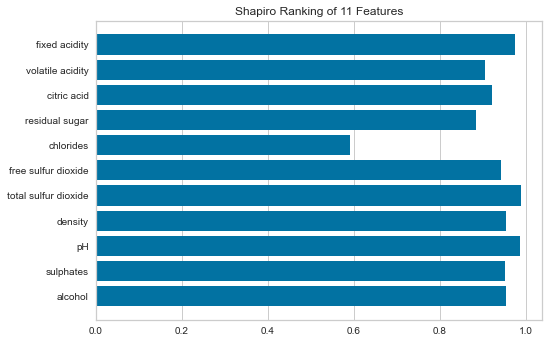

<AxesSubplot:title={'center':'Shapiro Ranking of 11 Features'}>

In [16]:
visualizer.fit(X,y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

In [17]:
visualizer2 = Rank2D(algorithm='pearson')

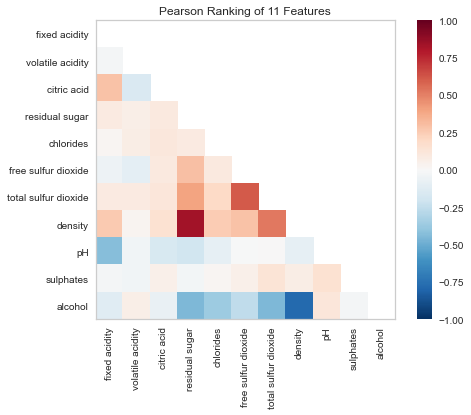

<AxesSubplot:title={'center':'Pearson Ranking of 11 Features'}>

In [18]:
visualizer2.fit(X,y)           # Fit the data to the visualizer
visualizer2.transform(X)        # Transform the data
visualizer2.show()              # Finalize and render the figure

## Testing with best param and best features

In [19]:
# using 5 parameters we have determined may result with better results:
X2 = white_wines.drop(["quality",'chlorides', 'target'], axis=1)
y2 = white_wines.target

In [20]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, random_state=42)

In [21]:
X_scaler2 = StandardScaler().fit(X_train2)
X_train_scaled2 = X_scaler2.transform(X_train2)
X_test_scaled2 = X_scaler2.transform(X_test2)

In [22]:
mlp2 = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,2), (50,2), (100,2)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv2 = GridSearchCV(mlp, parameters, cv=5)
cv2.fit(X_train_scaled2, y_train2)

print_results(cv2)

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'constant'}

0.765 (+/-0.025) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'constant'}
0.773 (+/-0.027) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'invscaling'}
0.768 (+/-0.023) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'adaptive'}
0.784 (+/-0.02) for {'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'constant'}
0.768 (+/-0.023) for {'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'invscaling'}
0.779 (+/-0.022) for {'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'adaptive'}
0.779 (+/-0.025) for {'activation': 'relu', 'hidden_layer_sizes': (100, 2), 'learning_rate': 'constant'}
0.783 (+/-0.03) for {'activation': 'relu', 'hidden_layer_sizes': (100, 2), 'learning_rate': 'invscaling'}
0.782 (+/-0.035) for {'activation': 'relu', 'hidden_layer_sizes':

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [23]:
cv2.best_estimator_

MLPClassifier(hidden_layer_sizes=(50, 2))

In [24]:
predictions2 = cv2.predict(X_test_scaled2)
print(classification_report(y_test2, predictions2))

              precision    recall  f1-score   support

           0       0.74      0.46      0.57       397
           1       0.78      0.92      0.84       828

    accuracy                           0.77      1225
   macro avg       0.76      0.69      0.71      1225
weighted avg       0.77      0.77      0.75      1225



In [25]:
print(f"Training Data Score: {cv2.score(X_train_scaled2, y_train2)}")
print(f"Testing Data Score: {cv2.score(X_test_scaled2, y_test2)}")

Training Data Score: 0.8056084944187313
Testing Data Score: 0.7714285714285715


In [26]:
# using all parameters except chlorides better results:
X3 = white_wines.drop(["quality",'chlorides', 'target'], axis=1)
y3 = white_wines.target

In [27]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3, random_state=42)

In [28]:
X_scaler3 = StandardScaler().fit(X_train3)
X_train_scaled3 = X_scaler3.transform(X_train3)
X_test_scaled3 = X_scaler3.transform(X_test3)

In [29]:
mlp3 = MLPClassifier(activation= 'relu', hidden_layer_sizes= (50, 2), learning_rate='constant')

mlp3.fit(X_train_scaled3, y_train3)

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(hidden_layer_sizes=(50, 2))

In [30]:
print(f"Training Data Score: {mlp3.score(X_train_scaled3, y_train3)}")
print(f"Testing Data Score: {mlp3.score(X_test_scaled3, y_test3)}")

Training Data Score: 0.8328341954805336
Testing Data Score: 0.7763265306122449


In [31]:
predictions3 = mlp3.predict(X_test_scaled3)
print(classification_report(y_test3, predictions3))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       397
           1       0.84      0.83      0.83       828

    accuracy                           0.78      1225
   macro avg       0.74      0.75      0.75      1225
weighted avg       0.78      0.78      0.78      1225



In [32]:
import joblib

In [33]:
filename = 'MLP_White.sav'
joblib.dump(mlp3, filename)

['MLP_White.sav']

In [34]:
loaded_model= joblib.load(filename)

result=loaded_model.score(X_test_scaled3, y_test3)

print(result)

0.7763265306122449
